## Procesamiento de Datos

El procesamiento de datos en data science se refiere al conjunto de técnicas, métodos y procesos utilizados para transformar datos brutos en información significativa y útil. Es una parte fundamental del ciclo de vida de los datos y juega un papel crucial en el análisis de datos y la generación de conocimiento.

El procesamiento de datos en data science implica varias etapas, que pueden incluir:

1. **Limpieza de datos:** Identificar y corregir errores, inconsistencias o valores atípicos en los datos. Esto puede incluir la eliminación de datos duplicados, el manejo de valores perdidos (**NaN's**) y la estandarización de formatos.
<br>

2. **Transformación de datos:** Convertir los datos en un formato más adecuado para su análisis. Esto puede incluir la normalización de datos, la codificación de variables categóricas, la creación de nuevas características y la agregación de datos.
<br>

3. **Análisis exploratorio de datos (EDA):** Explorar y visualizar datos para comprender patrones, tendencias y relaciones. Esto incluye la estadísticas descriptivas y la creación de gráficos o visualizaciones.
<br>

El objetivo del procesamiento de datos es preparar datos para aplicar técnicas de modelado estadístico o Machine Learning, lo que implica la transformación de variables, la creación de nuevas características y la preparación de conjuntos de datos para entrenar y evaluar modelos.

Estas etapas de procesamiento de datos no necesariamente siguen un orden, también es normal ver que algunas etapas se entrelazan.

In [1]:
!pip install scikit-learn

^C
ERROR: Operation cancelled by user


In [2]:
import numpy as np
import pandas as pd

import matplotlib # Para ver la versión
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn # Para ver la versión

In [3]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"pandas=={pd.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scikit-learn=={sklearn.__version__}")

numpy==1.20.3
pandas==1.2.4
matplotlib==3.4.2
seaborn==0.11.1
scikit-learn==1.5.1


### Procesamiento de Datos: Titanic

Para este ejemplo vamos a utilizar el dataset de titanic, pasaremos por las cuatro etapas descritas anteriormente.

El objetivo del procesamiento de datos es preparar el **DataFrame** para ser usado con un modelo predictivo de **Machine Learning**. Donde el modelo predictivo tendrá como finalidad predecir si una persona sobrevive o no (columna _Survived_) dependiendo de sus atributos.

Esto significa que todas las columnas y filas deben tener valores numéricos (cardinales, ordinales o booleanos en formato numerico).

- **Números Cardinales**: se utilizan para contar cantidades.
- **Números Ordinales**: se utilizan para indicar posición u orden relativo de un elemento en una secuencia.
- **Booleanos**: Verdadero o Falso, 1 ó 0 respectivamente.

In [43]:
df = pd.read_csv("../Data/titanic.csv")

df

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Sibsp,Parch,Embarked,Embark_Town,Survived
0,1,"Braund, Mr. Owen Harris",male,22.0,3,A/5 21171,7.2500,1,0,C,Cherbourg,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,0,0,S,Southampton,1
2,3,"Heikkinen, Miss. Laina",female,26.0,3,STON/O2. 3101282,7.9250,1,0,S,Southampton,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,113803,53.1000,0,0,S,Southampton,1
4,5,"Allen, Mr. William Henry",male,35.0,3,373450,8.0500,0,0,Q,Queenstown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,"Rice, Mrs. William (Margaret Norton)",female,39.0,3,382652,29.1250,0,0,S,Southampton,0
886,887,"Montvila, Rev. Juozas",male,27.0,2,211536,13.0000,0,0,S,Southampton,0
887,888,"Graham, Miss. Margaret Edith",female,19.0,1,112053,30.0000,1,2,S,Southampton,1
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,W./C. 6607,23.4500,0,0,C,Cherbourg,0


In [44]:
df.groupby("Sex")['Survived'].mean()

Sex
female    0.742038
male      0.189236
Name: Survived, dtype: float64

### 01. Recopilación de Datos 

En este ejemplo los datos los obtenemos a través de un **.csv**, además vamos a utilizar _**pandas**_ para conocer mejor las características del **DataFrame**:

- Número de elementos (filas).
- Numero de atributos (columnas).
- Validar los tipos de datos de cada atributo.
- Información estadística descriptiva.
- Conocer el número de NaN's.

In [5]:
# .shape nos da el número de filas y columnas

df.shape

(890, 12)

In [6]:
# .describe() nos da un DataFrame con la información estadística de las columnas

df.describe()

,PassengerId,Age,Pclass,Fare,Sibsp,Parch,Survived
count,890.000000,713.000000,890.000000,890.000000,890.000000,890.000000,890.000000
mean,445.500000,29.695891,2.307865,32.231685,0.522472,0.382022,0.384270
std,257.065167,14.536439,0.836220,49.714597,1.103247,0.806409,0.486696
min,1.000000,0.420000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,223.250000,20.000000,2.000000,7.925000,0.000000,0.000000,0.000000
50%,445.500000,28.000000,3.000000,14.454200,0.000000,0.000000,0.000000
75%,667.750000,38.000000,3.000000,31.000000,1.000000,0.000000,1.000000
max,890.000000,80.000000,3.000000,512.329200,8.000000,6.000000,1.000000


In [7]:
# .info() nos da el tipo de variables de cada columna y si hay algun valor NaN

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  890 non-null    int64  
 1   Name         890 non-null    object 
 2   Sex          890 non-null    object 
 3   Age          713 non-null    float64
 4   Pclass       890 non-null    int64  
 5   Ticket       890 non-null    object 
 6   Fare         890 non-null    float64
 7   Sibsp        890 non-null    int64  
 8   Parch        890 non-null    int64  
 9   Embarked     888 non-null    object 
 10  Embark_Town  888 non-null    object 
 11  Survived     890 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Numero de NaN's

df.isna().sum()

PassengerId      0
Name             0
Sex              0
Age            177
Pclass           0
Ticket           0
Fare             0
Sibsp            0
Parch            0
Embarked         2
Embark_Town      2
Survived         0
dtype: int64

In [9]:
# Porcentaje de NaN's en cada columna

df.isnull().mean()

PassengerId    0.000000
Name           0.000000
Sex            0.000000
Age            0.198876
Pclass         0.000000
Ticket         0.000000
Fare           0.000000
Sibsp          0.000000
Parch          0.000000
Embarked       0.002247
Embark_Town    0.002247
Survived       0.000000
dtype: float64

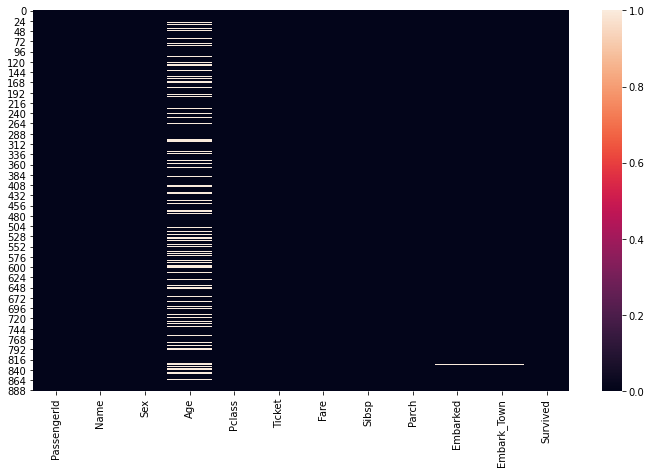

In [10]:
# Visualización de NaN's

plt.figure(figsize = (12, 7))

sns.heatmap(df.isna())
plt.show()

### 02. Limpieza de Datos

Esta es una de las etapas más complejas del procesamiento de datos y probablemente la que más tiempo consume.

En esta etapa se suelen utilizar métodos estadísticos y visualizaciones para:

- Identificar y corregir errores.
- Identificar valores atípicos (**outliers**)
- Eliminar duplicados.
- Manipulación de NaN's.
- Estandarización de formatos.

En esta etapa es muy importante conocer el significado de cada columna:

- **PassengerId**: Identificador de pasajero.

- **Name**: El nombre del pasajero.

- **Sex**: El género del pasajero, masculino o femenino.

- **Age**: La edad del pasajero.

- **Pclass**: Representa la clase del boleto del pasajero (1, 2 o 3), donde 1 es primera clase, 2 es segunda clase y 3 es tercera clase.

- **Ticket**: El número del boleto.

- **Fare**: La tarifa pagada por el pasajero.

- **Sibsp**: Indica la cantidad de hermanos o cónyuges que el pasajero tenía a bordo.

- **Parch**: Representa la cantidad de padres o hijos que el pasajero tenía a bordo.

- **Embarked**: Indica el puerto de embarque del pasajero abreviado.

- **Embark_Town**: Indica el puerto de embarque del pasajero.

- **Survived**: Indica si el pasajero sobrevivió o no. Es una variable binaria, donde 1 significa que sobrevivió y 0 significa que no.

In [11]:
# Columna "PassengerId"

# En ejemplo la columna "PassengerId" debería tener valores únicos, uno para cada pasajero.
# Por lo general este tipo de columnas no aportan información porque es una columna categórica 
# y todos los valores son distintos.

# Su único uso es para identificar o filtrar filas.

df["PassengerId"].describe()

count    890.000000
mean     445.500000
std      257.065167
min        1.000000
25%      223.250000
50%      445.500000
75%      667.750000
max      890.000000
Name: PassengerId, dtype: float64

In [12]:
# Número de elemento únicos igual al número de filas

df["PassengerId"].nunique()

# Podemos eliminar esta columna, lo haremos más adelante

890

In [13]:
# Columna "Name"

# En este DataFrame la columna "Name" cumple el mismo proposito que la columna "PassemgerId"
# Podemos verificar que cada fila tiene un valor único.

df["Name"].unique().shape[0] == df.shape[0]

True

In [14]:
# De esta columna podemos sacar información como el apellido o el sexo de cada persona.
# Ya tenemos una columna que sexo ("Sex") que no tiene NaN's.

# Extraer apellidos

df["Surname"] = df["Name"].apply(lambda x : x.split(",")[0])

df.head(3)

# La columna "Name" también la podemos eliminar, lo haremos más adelante

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Sibsp,Parch,Embarked,Embark_Town,Survived,Surname
0,1,"Braund, Mr. Owen Harris",male,22.0,3,A/5 21171,7.2500,1,0,C,Cherbourg,0,Braund
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,0,0,S,Southampton,1,Cumings
2,3,"Heikkinen, Miss. Laina",female,26.0,3,STON/O2. 3101282,7.9250,1,0,S,Southampton,1,Heikkinen


In [15]:
# Columna "Sex"

# Columna de categoria o categorica.

# Para este tipo de columna en el que sabemos los posibles valores que puede contener
# debemos verificar que todos los valores tienen el mismo formato o si existe algun valor atípico/erroneo.

# Ya sabemos que esta columna no tienen NaN's.

df["Sex"].value_counts(normalize=True)

male      0.647191
female    0.352809
Name: Sex, dtype: float64

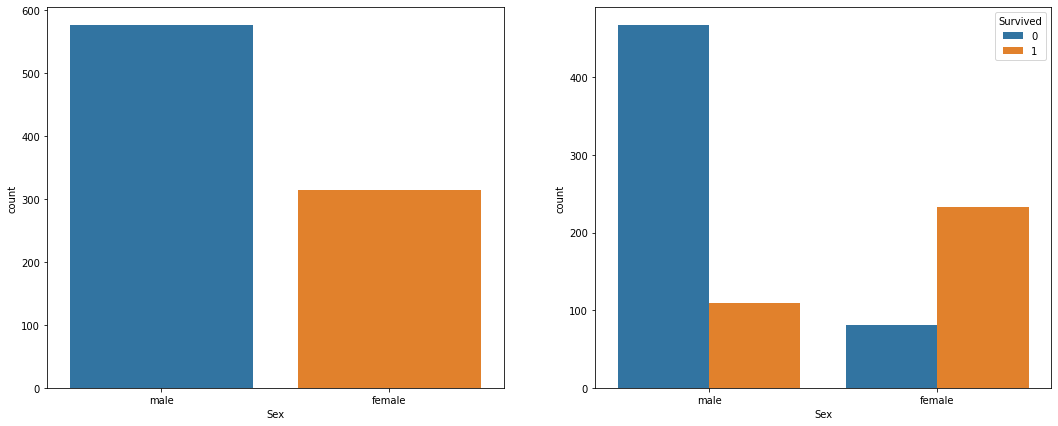

In [16]:
# Relación de la columna "Sex" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Sex"], ax = axes[0]);
sns.countplot(x = df["Sex"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [17]:
df["Embark_Town"].value_counts()

Southampton    643
Cherbourg      168
Queenstown      77
Name: Embark_Town, dtype: int64

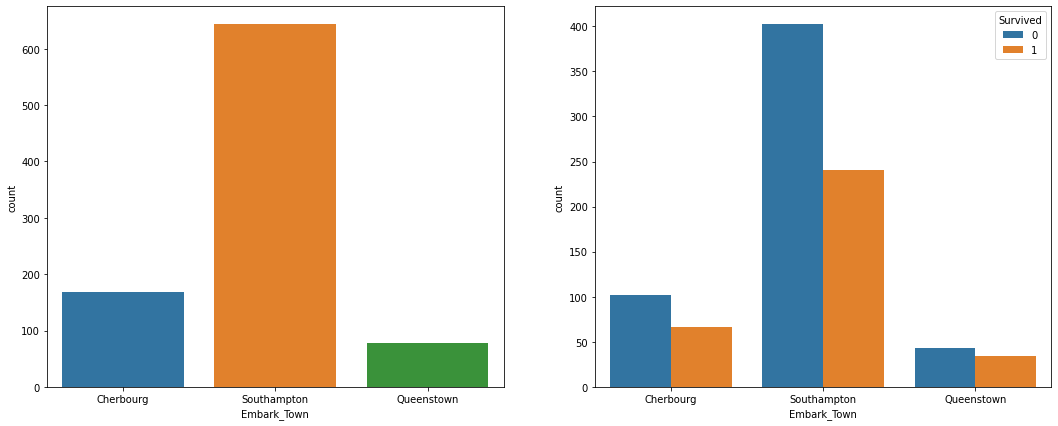

In [18]:
# Relación de la columna "Sex" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Embark_Town"], ax = axes[0]);
sns.countplot(x = df["Embark_Town"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [19]:
# Ahora debemos transformar la columna a valores numéricos.
# Para esto tenemos 3 métodos diferentes.

In [20]:
df.head(3)

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Sibsp,Parch,Embarked,Embark_Town,Survived,Surname
0,1,"Braund, Mr. Owen Harris",male,22.0,3,A/5 21171,7.2500,1,0,C,Cherbourg,0,Braund
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,0,0,S,Southampton,1,Cumings
2,3,"Heikkinen, Miss. Laina",female,26.0,3,STON/O2. 3101282,7.9250,1,0,S,Southampton,1,Heikkinen


In [21]:
import sklearn
# scikit - learn

### Encodings
Scikit Learn trae varios objetos que podemos utilizar para codificar nuestras variables categóricas y convertir los valores en números:

1. _**LabelEncoder()**_ y _**OrdinalEncoder()**_: estos objetos permiten transformar toda la columna a números enteros, si la columna tiene _**n**_ elementos únicos, va a cambiar esos elementos por lo números desde el 0 hasta n - 1. Éste método resulta de utilidad si la categoria sigue cierto orden. El orden de la transformación depende del orden en el que los elementos aparecen en la columna, por lo que debemos primero ordenar nuestro dataframe para asegurarnos de que los números corresponden con las categorías que queremos.
<br>

2. _**OneHotEncoder()**_: este encoder se utiliza para transformar columnas categóricas en un conjunto de columnas binarias (0 o 1) que representan la presencia o ausencia de cada categoría en los datos originales. Esto es particularmente útil para codificar columnas categóricas nominales, ya que no se le asigna un peso a cada cateogría.

    La principal desventaja es que este tipo de encoding puede incrementar mucho la dimensionalidad de nuestros datos, pues estamos creando una columna para cada cateogría. Podemos remediar esto ligeramente marcando en el constructor el parámetro `drop="first"`, para deshacernos siempre de una dimensión redundante. Esto sin embargo puede ser negativo ya que rompe la simetría de las categorías en caso de usar el parámetro `handle_unknown="ignore"`.
<br>

3. _**TargetEncoder()**_: este encoder agrupa nuestros datos por las categorías y calcula el promedio de la columna _**target**_. Luego, utiliza estos promedios en conjunto al promedio global del _**target**_ para asignarle un número a cada categoría. El parámetro `smooth="auto"` (por defecto) hace la ponderación entre promedio global y promedios por categoría por nosotros, pero también podemos asignarle un número flotante para controlar cuánto peso tiene cada promedio. Un número muy pequeño como `smooth=1.0` hará que casi no se tenga en cuenta el promedio global, mientras que un número muy grande como `smooth=5000.0` le dará mucho más peso al promedio global que a los específicos de cada categoría.
<br>

Además de utilizar los objetos de Scikit Learn, podemos hacer cualquier encoding que se nos ocurra con los métodos `.map()` y `.apply()` de las Series de pandas, aplicándo una función propia creada por nosotros o un diccionario que guarda los encodings.

In [22]:
# Veamos como es la columna

df["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
885    female
886      male
887    female
888    female
889      male
Name: Sex, Length: 890, dtype: object

In [23]:
# Map/Apply

# Con ésta técnica vamos a generar un diccionario para reemplazar los elementos de la columna

dict_sex = {x : num for num, x in enumerate(df["Sex"].unique())}

dict_sex

{'male': 0, 'female': 1}

In [24]:
# Map

df["Sex"].map(dict_sex)

0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
888    1
889    0
Name: Sex, Length: 890, dtype: int64

In [25]:
# Apply

df["Sex"].apply(lambda x : dict_sex[x])

0      0
1      1
2      1
3      1
4      0
      ..
885    1
886    0
887    1
888    1
889    0
Name: Sex, Length: 890, dtype: int64

In [28]:
# pd.get_dummies()

pd.get_dummies(data = df["Sex"], prefix = "Sex", dtype = int)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
888,1,0


In [29]:
# pd.get_dummies()

# Cuando hacemos One-Hot Encoding podemos eliminar una columna, ya que podemos inferir el resultado de la columna
# eliminada solo con ver los valores de las columnas restantes.

# Por ejemplo, si eliminamos la columna "Sex_female", con ver los datos en la columna "Sex_male"
# Podemos inferir cuales son los elementos en "Sex_female"

# Esto tiene especial uso para reducir la dimensionalidad de los DataFrames.

pd.get_dummies(data = df["Sex"], prefix = "Sex", dtype = int, drop_first = False)

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
888,1,0


In [30]:
# Podemos también hacer One Hot Encoding utilizando el OneHotEncoder de Scikit Learn
from sklearn.preprocessing import OneHotEncoder

# Inicializamos un objeto OneHotEncoder()
sex_encoder = OneHotEncoder()

# Lo "entrenamos" con los datos de la columna
# Recibe una matriz o un DataFrame, por lo que seleccionamos nuestra columna o columnas con una lista df[[col]]
sex_encoder.fit(df[["Sex"]])

# Transformamos la(s) columna(s) y las convertimos en un array
sex_encoder.transform(df[["Sex"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [31]:
# Podemos "entrenar" y transformar con un solo método
sex_encoder = OneHotEncoder()
sex_encoder.fit_transform(df[["Sex"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [ ]:
# Podemos deshacernos de una dimensión con drop="first" en el constructor
sex_encoder = OneHotEncoder(drop="first")
sex_encoder.fit_transform(df[["Sex"]]).toarray()

In [33]:
# Podemos marcar handle_unknown para que cuando reciba una categoría diferente a las que ve "entrenando",
# marque todas las columnas con un 0. Utilizar esto en conjunto con drop="first" es una mala práctica ya que
# puede darse el caso de que se reciba la categoría que se ha "dropeado". En ese caso, debemos usar 
# handle_unknown="error" para que el encoder arroje una excepción si llega a suceder.
sex_encoder = OneHotEncoder(handle_unknown="ignore")
sex_encoder.fit_transform(df[["Sex"]]).toarray()

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [34]:
df.columns

Index(['PassengerId', 'Name', 'Sex', 'Age', 'Pclass', 'Ticket', 'Fare',
       'Sibsp', 'Parch', 'Embarked', 'Embark_Town', 'Survived', 'Surname'],
      dtype='object')

In [35]:
# LabelEncoder()
from sklearn.preprocessing import LabelEncoder

# Inicializamos un objeto LabelEncoder()
sex_encoder = LabelEncoder()

# Lo "entrenamos" con los datos de la columna
sex_encoder.fit(df["Sex"].values)

# Transformamos la columna
sex_encoder.transform(df["Sex"].values)

# El resultado de esta transformación es un array de 0s y 1s
# Podemos igualar la columna a este array

# df["Sex"] = sex_encoder.transform(df["Sex"].values)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [36]:
# .inverse_transform() invierte la transformación a la categoria original.

sex_encoder.inverse_transform([0, 1])

array(['female', 'male'], dtype=object)

In [37]:
sklearn.__version__

'1.5.1'

In [ ]:
# Podemos utilizar el TargetEncoder para hacer un target encoding por la media
from sklearn.preprocessing import TargetEncoder

# Inicializamos un objeto TargetEncoder()
sex_encoder = TargetEncoder(target_type="binary")

# Lo "entrenamos" con los datos de la columna y la transformamos
sex_encoder.fit_transform(df[["Sex"]], df["Survived"])

In [51]:
# .classes_ muestra los nombres originales de las categorias.

sex_encoder.classes_

array([0, 1])

In [53]:
sex_column

,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
885,1.0,0.0
886,0.0,1.0
887,1.0,0.0
888,1.0,0.0


In [54]:
# Para la columna "Sex" vamos a elegir OneHotEncoder
# Podemos utilizar `.set_output()` para que retorne un DataFrame. Es necesario que sparse_output sea False.

sex_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
sex_encoder.set_output(transform="pandas")
sex_column = sex_encoder.fit_transform(df[["Sex"]])

# Añadimos la columna al DataFrame usando pd.concat()

df = pd.concat(objs = [df, sex_column], axis = 1)

df.head(3)

# Ahora podemos eliminar la columna "Sex", lo haremos más adelante

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Sibsp,Parch,Embarked,Embark_Town,Survived,Sex_female,Sex_male,Sex_female,Sex_male
0,1,"Braund, Mr. Owen Harris",male,22.0,3,A/5 21171,7.2500,1,0,C,Cherbourg,0,0.0,1.0,0.0,1.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,PC 17599,71.2833,0,0,S,Southampton,1,1.0,0.0,1.0,0.0
2,3,"Heikkinen, Miss. Laina",female,26.0,3,STON/O2. 3101282,7.9250,1,0,S,Southampton,1,1.0,0.0,1.0,0.0


In [58]:
# Columna "Age"

# Esta es una de las columnas con NaN's.

df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
Name: Age, Length: 890, dtype: float64

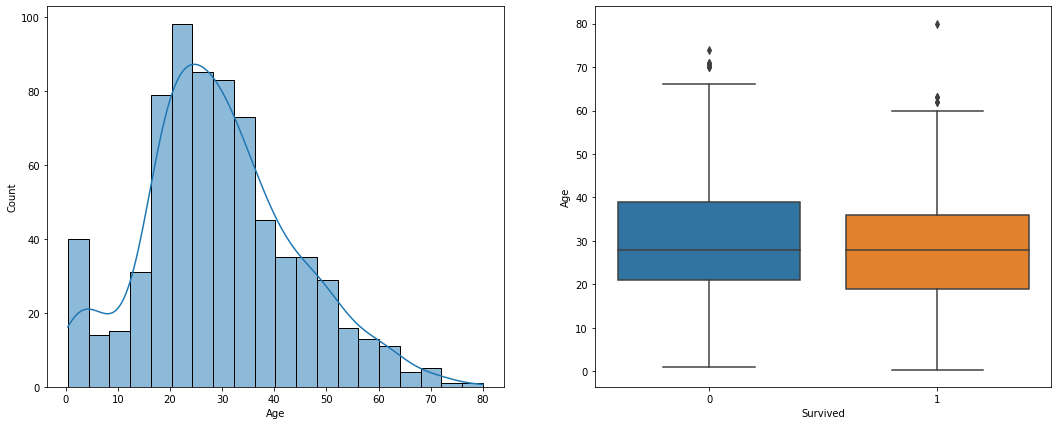

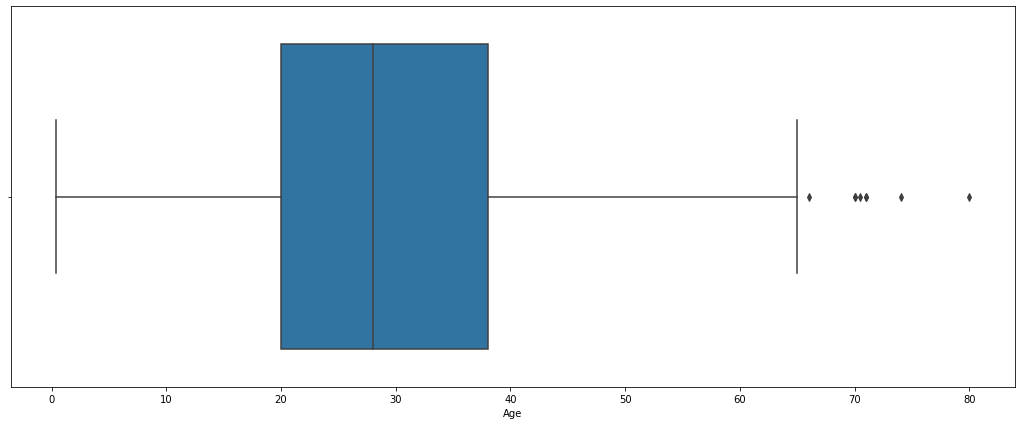

In [59]:
# Relación de la columna "Age" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Age"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Age"], ax = axes[1]);
plt.show()


plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Age"]);
plt.show()

### Manejo de Outliers

Para los outliers existen diferentes técnicas para manipularlos:

1. **Rango Intercuartil (IQR)**:

El rango intercuartil (**Interquartile Range - IQR**) es una medida estadística de dispersión que representa la amplitud del rango medio del conjunto de datos.

- El rango intercuartil es útil porque es menos sensible a valores extremos que el rango total.

$$
IQR = Q3 - Q1
$$

Para usar el **IQR** debemos definir un umbral para outliers, estos suelen establacerse multiplicando el **IQR** por un factor constante, los más comunes suelen encontrarse entre 1.5 y 3.

$$
Lower = Q1 - K*IQR
$$
$$
Upper = Q3 + K*IQR
$$
- Los umbrales deben definirse dependiendo de los datos de cada columna, no necesariamente funcionará el mismo umbral para todo el conjunto.

2. **Transformaciones Logarítimicas**:

Aplicar la transformación logarítmica a los datos puede reducir la influencia de los valores atípicos y ayudar a que la distribución sea más simétrica.

$$
log_{10}(x)
$$
$$
Ln(x) = log_{e}(x)
$$

3. **Clustering**:

Aplicar modulos de clustering para encontrar outliers alejados de nubes de puntos. Algunos modelos pueden ser: **DBSCAN** o **KMeans**.

4. **Capping**:

Sustituir outliers por un límite superior o inferior asignados de forma arbitraria.


**En caso de que los outliers sean simplemente valores imposibles podemos considerar eliminarlos, como por ejemplo alguien con una edad de 160 años, altura negativa o fecha de nacimiento posterior a la fecha actual.**

Realizaremos el manejo de outliers de la columna **Age** después de llenar los NaN's.

### Manejo de NaN's

Existen diferentes estrategias cuando una columna tiene NaN's:

- Eliminar filas con NaN's.
- Eliminar la columna.
- Imputación de Datos.
- Crear una categoría nueva como **Unknown** o **N/A** en columnas categóricas.

### Imputación de Datos

La imputación de datos es la sustitución de valores NaN's en una fila por otros.

En general existen 2 técnicas:

1. La primera técnica consiste en rellenar estos valores con la **media** (o **mediana**) de los datos de la variable en el caso de que se trate de una **variable numérica**. Para el caso de las **variables categóricas** imputamos los NaN's con la **moda** de la variable.
<br>

2. La segunda técnica, que es más avanzada, consiste en el uso de **modelos predictivos** para estimar los NaN's. Un modelo no paramétrico muy popular para estos casos es el **K-Nearest Neighbors (KNN)**, donde se calculan los valores NaN's como la media de los valores de los **k-vecinos u observaciones mas cercanos**.

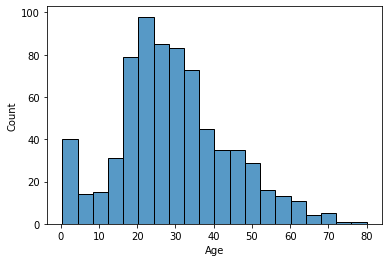

In [60]:
# Con NaNs
sns.histplot(df["Age"])
plt.show()

In [61]:
# Primera técnica:

# Para la imputación de los datos vamos a "llenar" los NaN's por la media de edad

df["Age"].fillna(df["Age"].mean())

# En este ejemplo llena TODOS los NaN's por la misma media.
# No es in-place

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
885    39.000000
886    27.000000
887    19.000000
888    29.695891
889    26.000000
Name: Age, Length: 890, dtype: float64

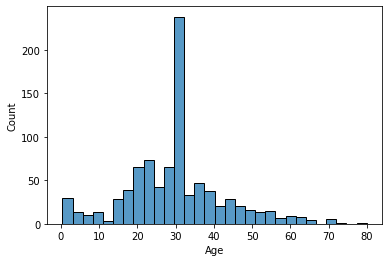

In [62]:
# Con NaNs reemplazados por el promedio
sns.histplot(df["Age"].fillna(df["Age"].mean()))
plt.show()

In [63]:
# Segunda técnica:

# Reemplaza los NaN's de la columna "Age" por la media de las edades de los k-vecinos mas cercanos (KNN).

from sklearn.impute import KNNImputer

# KNNImputer recibe un DataFrame que solo contenga números, para este momento no tenemos el DataFrame preparado
# Dejaremos el código para ejecutarlo más adelante

In [64]:
# Columna "Pclass"

# Columna categórica, ya está en valores numéricos y no tiene NaN's.

df["Pclass"].value_counts()

3    490
1    216
2    184
Name: Pclass, dtype: int64

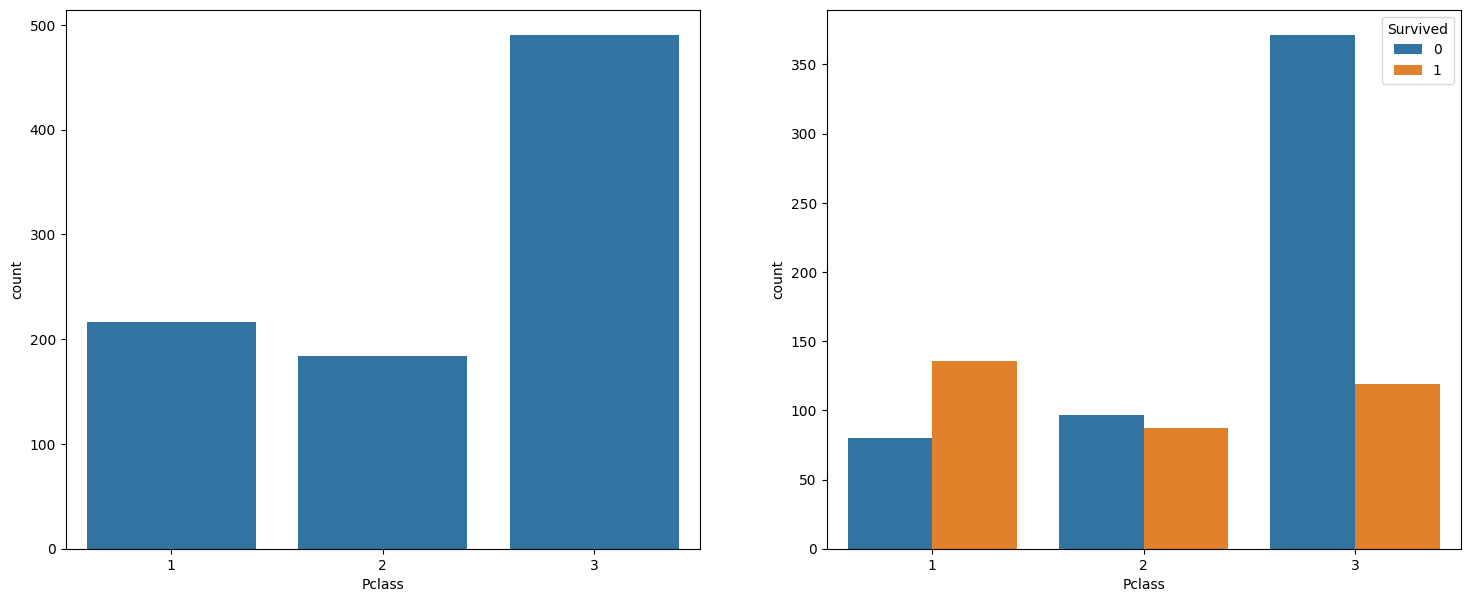

In [39]:
# Relación de la columna "Pclass" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Pclass"], ax = axes[0]);
sns.countplot(x = df["Pclass"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [40]:
# Columna "Ticket"

# Variable categórica con muchos elementos diferentes (534 valores únicos)
# Probablemente no aporte mucha información el número de ticket

# Vamos a usar .value_counts().to_dict() para transformar esta columna a numérica sustituyendo
# su valor por el número de veces que se repite.

df["Ticket"].value_counts()

Ticket
CA. 2343    7
1601        7
347082      7
347088      6
3101295     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
111369      1
Name: count, Length: 680, dtype: int64

In [65]:
# Map
ticket_map = df["Ticket"].value_counts().to_dict()

# Transformación
df["Ticket"] = df["Ticket"].map(ticket_map)

df["Ticket"]

0      1
1      1
2      1
3      2
4      1
      ..
885    5
886    1
887    1
888    2
889    1
Name: Ticket, Length: 890, dtype: int64

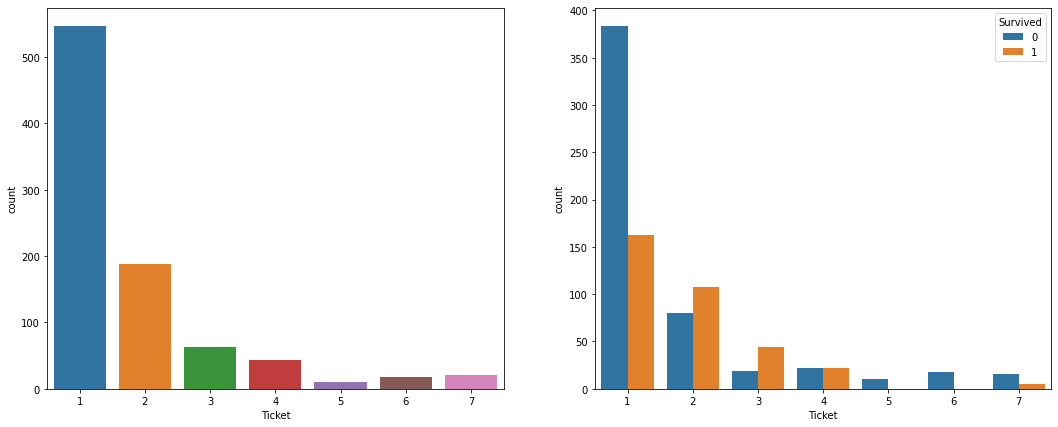

In [66]:
# Relación de la columna "Ticket" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Ticket"], ax = axes[0]);
sns.countplot(x = df["Ticket"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [73]:
# Columna "Fare"

# Precio del ticket, ya es una columna numérica y no tiene NaN's.

df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
885    29.1250
886    13.0000
887    30.0000
888    23.4500
889    30.0000
Name: Fare, Length: 890, dtype: float64

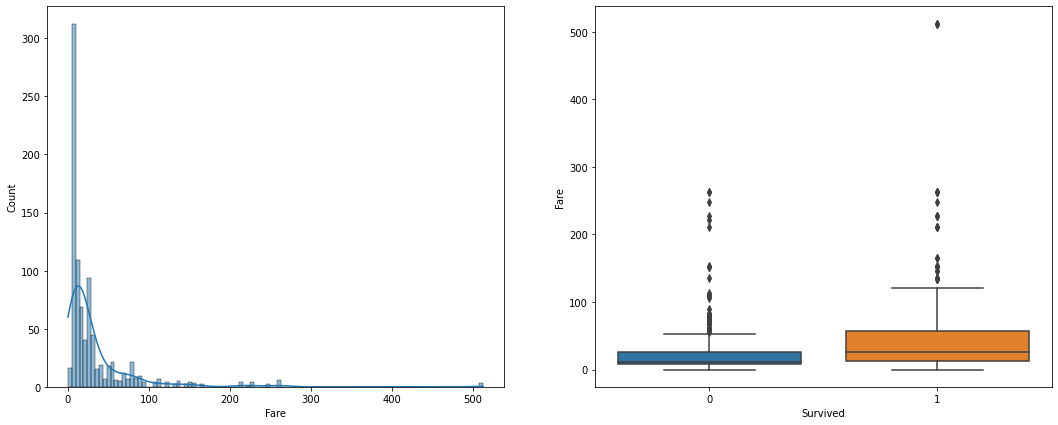

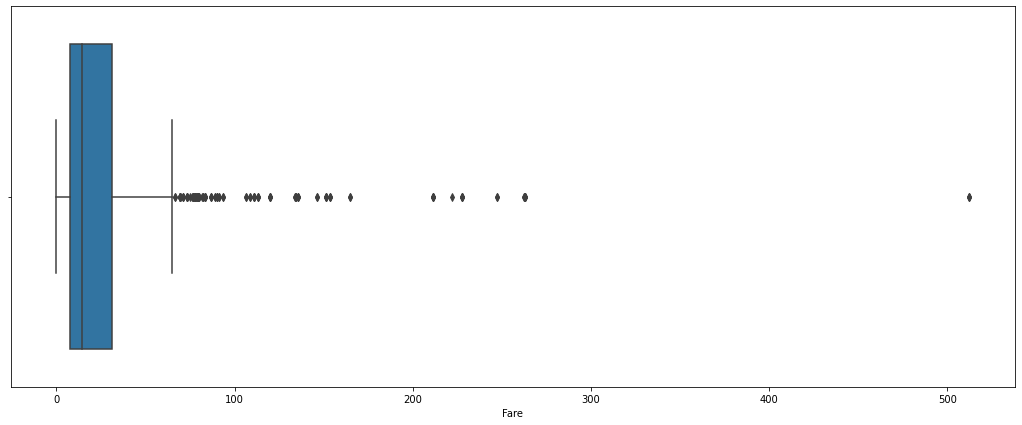

In [74]:
# Relación de la columna "Fare" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Fare"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Fare"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Fare"]);
plt.show()

In [75]:
# Transformación Logarítmica

df["Log_Fare"] = df["Fare"].apply(lambda x : np.log(x + 1))

# Aplicamos np.log(x + 1) para evitar log(0)

df["Log_Fare"]

0      2.110213
1      4.280593
2      2.188856
3      3.990834
4      2.202765
         ...   
885    3.405355
886    2.639057
887    3.433987
888    3.196630
889    3.433987
Name: Log_Fare, Length: 890, dtype: float64

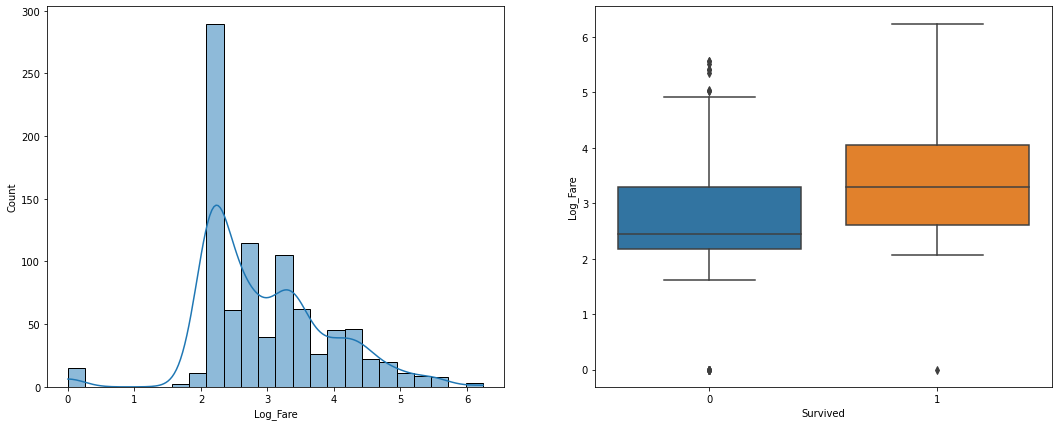

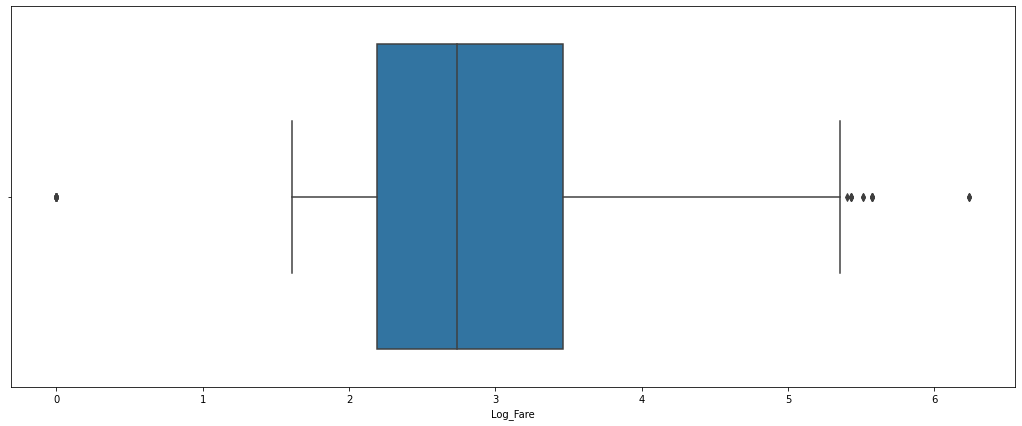

In [76]:
# Relación de la columna "Log_Fare" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Log_Fare"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Log_Fare"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Log_Fare"]);
plt.show()

# Nota: También podemos aplicar el IQR a esta transformación para eliminar outliers

In [77]:
# Columna "Sibsp"

# Columna categórica, ya es numérica y no tiene NaN's.

df["Sibsp"].sort_values().value_counts(sort = False)

0    608
1    208
2     28
3     16
4     18
5      5
8      7
Name: Sibsp, dtype: int64

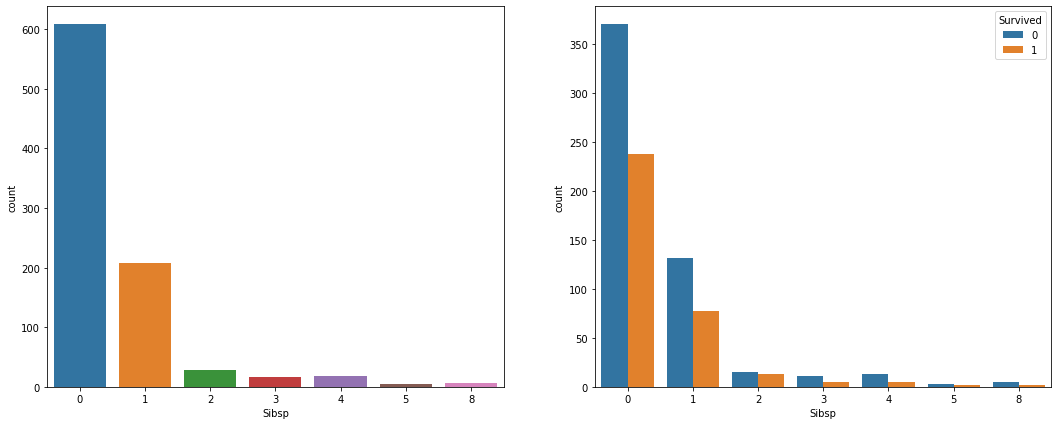

In [78]:
# Relación de la columna "Sibsp" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Sibsp"], ax = axes[0]);
sns.countplot(x = df["Sibsp"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [79]:
# Columna "Parch"

# Columna categórica, ya es numérica y no tiene NaN's

df["Parch"].sort_values().value_counts(sort = False)

0    677
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64

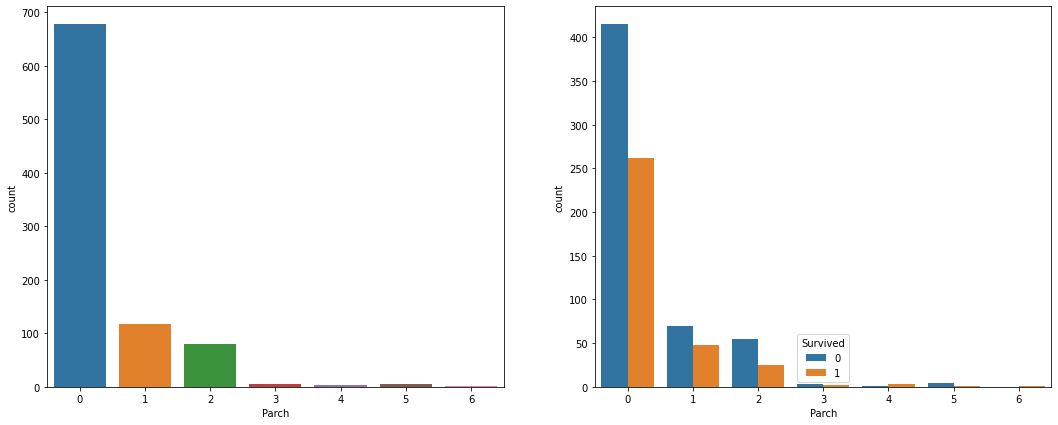

In [80]:
# Relación de la columna "Parch" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Parch"], ax = axes[0]);
sns.countplot(x = df["Parch"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [81]:
# Columnas "Embarked" y "Embark_Town"

# Ambas columnas categóricas que representan lo mismo.
# Debemos transformar una de las dos a númerica y eliminar la otra, por que representan la misma información
# Ambas tienen NaN's en la mismas filas

df["Embarked"].value_counts(dropna = False)

S      643
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

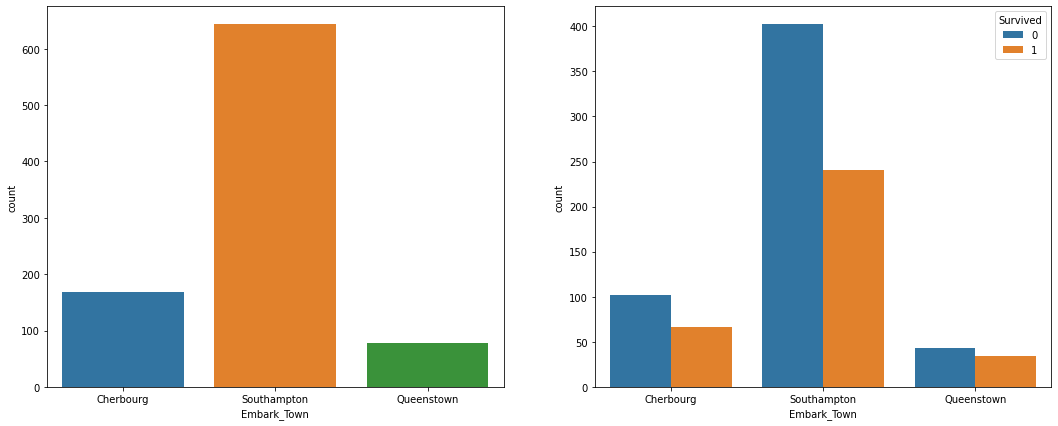

In [86]:
# Relación de la columna "Embark_Town" con la columna "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.countplot(x = df["Embark_Town"], ax = axes[0]);
sns.countplot(x = df["Embark_Town"], hue = df["Survived"],  ax = axes[1]);

plt.show()

In [87]:
# Misma información

df["Embark_Town"].value_counts(dropna = False)

Southampton    643
Cherbourg      168
Queenstown      77
NaN              2
Name: Embark_Town, dtype: int64

In [88]:
# Vamos a utilizar pd.get_dummies() con la columna "Embark_Town"

embark_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
embark_encoder.set_output(transform="pandas")
embark_column = embark_encoder.fit_transform(df[["Embark_Town"]])

# Añadimos la columna al DataFrame usando pd.concat()

df = pd.concat(objs = [df, embark_column], axis = 1)

df

,PassengerId,Name,Sex,Age,Pclass,Ticket,Fare,Sibsp,Parch,Embarked,Embark_Town,Survived,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Embark_Town_nan
0,1,"Braund, Mr. Owen Harris",male,22.0,3,1,7.2500,1,0,C,Cherbourg,0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,1,71.2833,0,0,S,Southampton,1,1.0,0.0,4.280593,0.0,0.0,1.0,0.0
2,3,"Heikkinen, Miss. Laina",female,26.0,3,1,7.9250,1,0,S,Southampton,1,1.0,0.0,2.188856,0.0,0.0,1.0,0.0
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,2,53.1000,0,0,S,Southampton,1,1.0,0.0,3.990834,0.0,0.0,1.0,0.0
4,5,"Allen, Mr. William Henry",male,35.0,3,1,8.0500,0,0,Q,Queenstown,0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,"Rice, Mrs. William (Margaret Norton)",female,39.0,3,5,29.1250,0,0,S,Southampton,0,1.0,0.0,3.405355,0.0,0.0,1.0,0.0
886,887,"Montvila, Rev. Juozas",male,27.0,2,1,13.0000,0,0,S,Southampton,0,0.0,1.0,2.639057,0.0,0.0,1.0,0.0
887,888,"Graham, Miss. Margaret Edith",female,19.0,1,1,30.0000,1,2,S,Southampton,1,1.0,0.0,3.433987,0.0,0.0,1.0,0.0
888,889,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,3,2,23.4500,0,0,C,Cherbourg,0,1.0,0.0,3.196630,1.0,0.0,0.0,0.0


In [89]:
# Columna "Survived"

# Esta es la columna que queremos predecir
# En este caso estamos haciendo una clasificación, por lo que esta columna debe tener valores enteros

df["Survived"].value_counts()

0    548
1    342
Name: Survived, dtype: int64

In [91]:
# Por último vamos a eliminar las columnas que no hagan falta

# Decidimos eliminar "Fare" y quedarnos con "Log_Fare"

df.drop(["PassengerId", "Name", "Sex", "Embarked", "Embark_Town", "Fare"], axis = 1, inplace = True)

df

,Age,Pclass,Ticket,Sibsp,Parch,Survived,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Embark_Town_nan
0,22.0,3,1,1,0,0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1,1,0,0,1,1.0,0.0,4.280593,0.0,0.0,1.0,0.0
2,26.0,3,1,1,0,1,1.0,0.0,2.188856,0.0,0.0,1.0,0.0
3,35.0,1,2,0,0,1,1.0,0.0,3.990834,0.0,0.0,1.0,0.0
4,35.0,3,1,0,0,0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.0,3,5,0,0,0,1.0,0.0,3.405355,0.0,0.0,1.0,0.0
886,27.0,2,1,0,0,0,0.0,1.0,2.639057,0.0,0.0,1.0,0.0
887,19.0,1,1,1,2,1,1.0,0.0,3.433987,0.0,0.0,1.0,0.0
888,NaN,3,2,0,0,0,1.0,0.0,3.196630,1.0,0.0,0.0,0.0


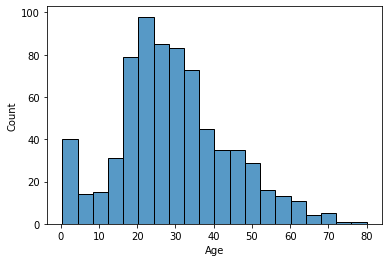

In [92]:
# Con NaNs
sns.histplot(df["Age"])
plt.show()

In [93]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer

# Usaremos KNNImputer para llenar los NaN's de la columna Age

# Segunda técnica:

# Reemplaza los NaN's de la columna "Age" por la media de las edades de los k-vecinos mas cercanos (KNN).

# IMPORTANTE: Debemos escalar los datos antes de utilizar un algoritmo como KNN, ya que funciona por distancias

scaler = MinMaxScaler()
scaler.set_output(transform="pandas")
df = scaler.fit_transform(df)

In [95]:
# KNNImputer recibe un DataFrame que solo contenga números

# Inicializamos el objeto Imputer
imputer = KNNImputer(n_neighbors = 3)
imputer.set_output(transform="pandas")

# Entrenamos el Imputer y transformamos el DataFrame
df = imputer.fit_transform(df)
df

# El resultado de utilizar el KNNImputer es un array, pero hemos utilizado el método .set_output() para
# que nos retorne un DataFrame de pandas.

# En este ejemplo llena cada NaN's por la media en las columnas numéricas.
# Solamente la columna "Age" tenia NaN's, por eso es la única que se modifica.

,Age,Pclass,Ticket,Sibsp,Parch,Survived,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Embark_Town_nan
0,0.271174,1.0,0.000000,0.125,0.000000,0.0,0.0,1.0,0.338125,1.0,0.0,0.0,0.0
1,0.472229,0.0,0.000000,0.000,0.000000,1.0,1.0,0.0,0.685892,0.0,0.0,1.0,0.0
2,0.321438,1.0,0.000000,0.125,0.000000,1.0,1.0,0.0,0.350727,0.0,0.0,1.0,0.0
3,0.434531,0.0,0.166667,0.000,0.000000,1.0,1.0,0.0,0.639463,0.0,0.0,1.0,0.0
4,0.434531,1.0,0.000000,0.000,0.000000,0.0,0.0,1.0,0.352955,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0.484795,1.0,0.666667,0.000,0.000000,0.0,1.0,0.0,0.545650,0.0,0.0,1.0,0.0
886,0.334004,0.5,0.000000,0.000,0.000000,0.0,0.0,1.0,0.422864,0.0,0.0,1.0,0.0
887,0.233476,0.0,0.000000,0.125,0.333333,1.0,1.0,0.0,0.550238,0.0,0.0,1.0,0.0
888,0.241853,1.0,0.166667,0.000,0.000000,0.0,1.0,0.0,0.512205,1.0,0.0,0.0,0.0


In [96]:
# Invertimos el escalado
# inverse_transform siempre retorna un array de numpy, por lo que debemos recomponer el dataframe de manera
# manual.

data = scaler.inverse_transform(df)
df = pd.DataFrame(data, columns=df.columns)
df

,Age,Pclass,Ticket,Sibsp,Parch,Survived,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Embark_Town_nan
0,22.000000,3.0,1.0,1.0,0.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.280593,0.0,0.0,1.0,0.0
2,26.000000,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.188856,0.0,0.0,1.0,0.0
3,35.000000,1.0,2.0,0.0,0.0,1.0,1.0,0.0,3.990834,0.0,0.0,1.0,0.0
4,35.000000,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.000000,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3.405355,0.0,0.0,1.0,0.0
886,27.000000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.639057,0.0,0.0,1.0,0.0
887,19.000000,1.0,1.0,1.0,2.0,1.0,1.0,0.0,3.433987,0.0,0.0,1.0,0.0
888,19.666667,3.0,2.0,0.0,0.0,0.0,1.0,0.0,3.196630,1.0,0.0,0.0,0.0


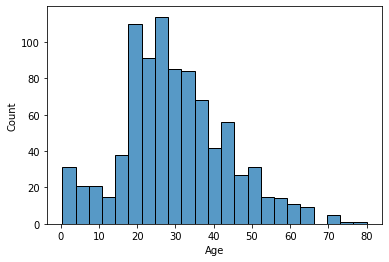

In [98]:
# Sin NaNs
sns.histplot(df["Age"])
plt.show()

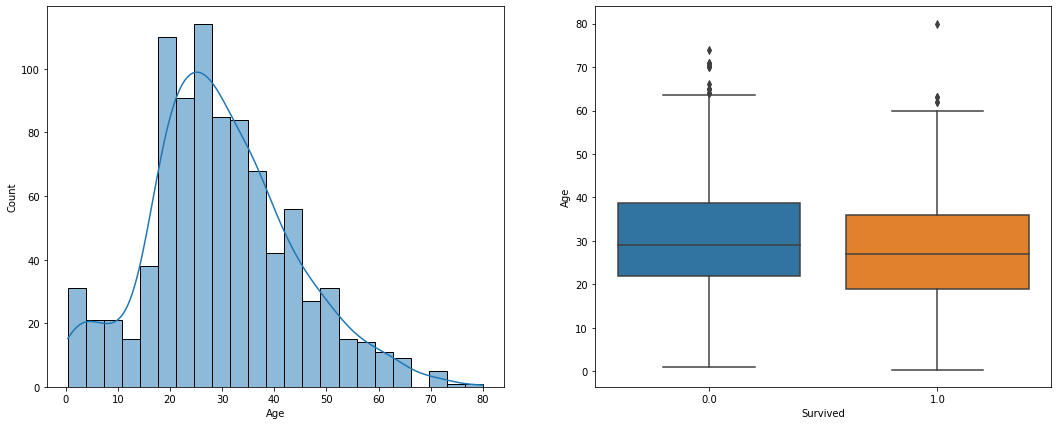

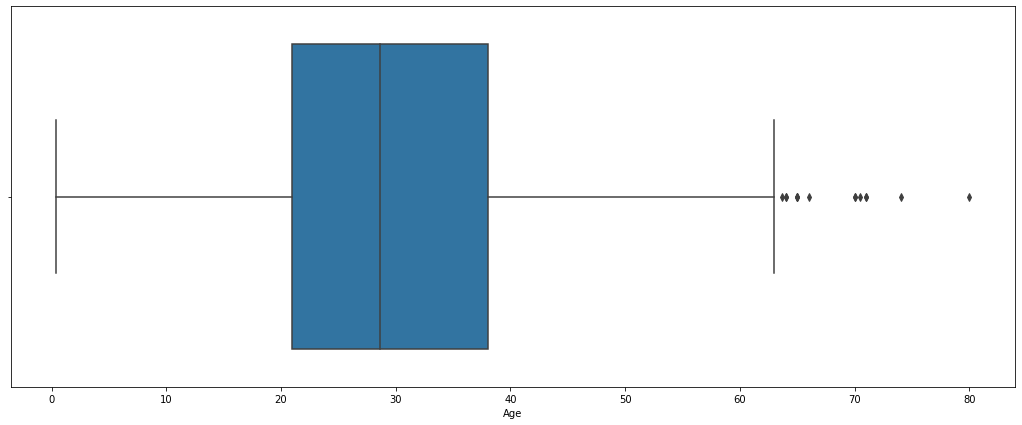

In [99]:
# Relación de la columna "Age" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Age"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Age"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Age"]);
plt.show()

In [100]:
# Manejo de outliers Columna "Age"
# Calculo de cuartiles - "Age"

q1 = df["Age"].quantile(q = 0.25)  # Q1
q3 = df["Age"].quantile(q = 0.75)  # Q3

# Rango intercuartil (IQR)
iqr = q3 - q1

# Calcular los limites inferior y superior
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

print(f"IQR: [{limite_inferior}, {limite_superior}]")

df = df[df["Age"].between(limite_inferior, limite_superior)]

print(f"df: {df.shape}")

IQR: [-4.5, 63.5]
df: (876, 13)


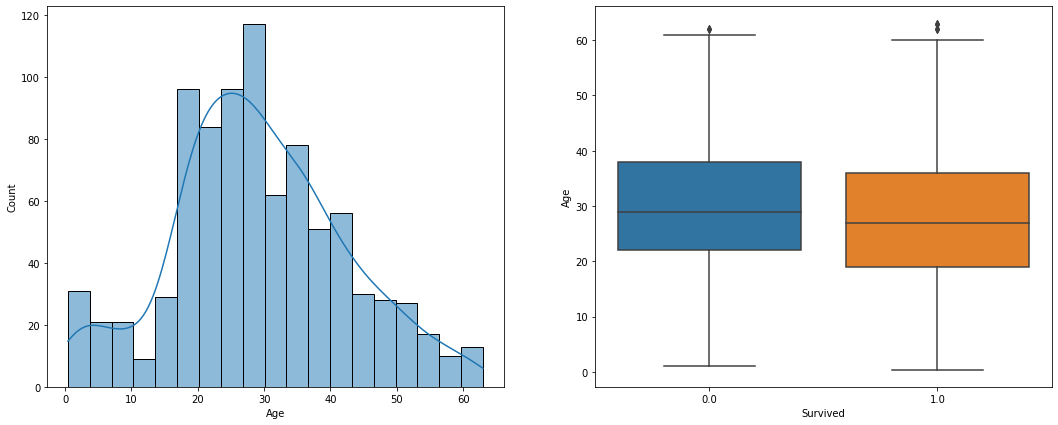

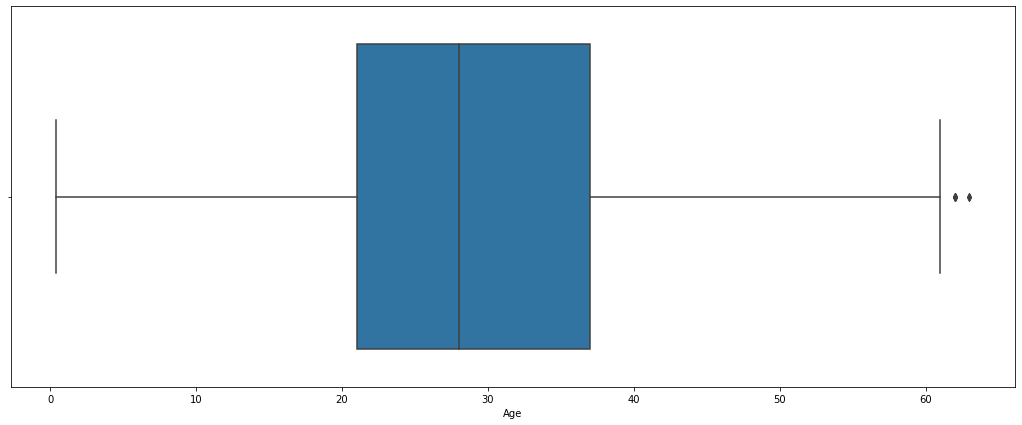

In [101]:
# Relación de la nueva columna "Age" con "Survived"

fig, axes = plt.subplots(1, 2, figsize = (18, 7))

sns.histplot(x = df["Age"], kde = True, ax = axes[0]);
sns.boxplot(x = df["Survived"], y = df["Age"], ax = axes[1]);
plt.show()

plt.figure(figsize = (18, 7))

sns.boxplot(x = df["Age"]);
plt.show()

In [102]:
# Resultado

df

,Age,Pclass,Ticket,Sibsp,Parch,Survived,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Embark_Town_nan
0,22.000000,3.0,1.0,1.0,0.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.000000,1.0,1.0,0.0,0.0,1.0,1.0,0.0,4.280593,0.0,0.0,1.0,0.0
2,26.000000,3.0,1.0,1.0,0.0,1.0,1.0,0.0,2.188856,0.0,0.0,1.0,0.0
3,35.000000,1.0,2.0,0.0,0.0,1.0,1.0,0.0,3.990834,0.0,0.0,1.0,0.0
4,35.000000,3.0,1.0,0.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,39.000000,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3.405355,0.0,0.0,1.0,0.0
886,27.000000,2.0,1.0,0.0,0.0,0.0,0.0,1.0,2.639057,0.0,0.0,1.0,0.0
887,19.000000,1.0,1.0,1.0,2.0,1.0,1.0,0.0,3.433987,0.0,0.0,1.0,0.0
888,19.666667,3.0,2.0,0.0,0.0,0.0,1.0,0.0,3.196630,1.0,0.0,0.0,0.0


In [103]:
# Reordenamos las columnas

df = df[["Age", "Pclass", "Ticket", "Sibsp", "Parch", "Sex_female", "Sex_male", "Log_Fare",
         "Embark_Town_Cherbourg", "Embark_Town_Queenstown", "Embark_Town_Southampton", "Survived"]]

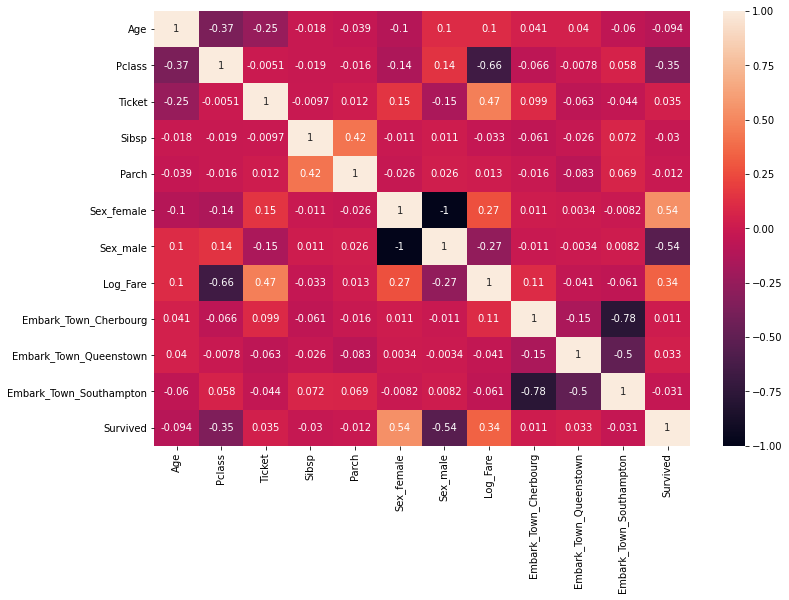

In [104]:
### Correlación

plt.figure(figsize = (12, 8))

sns.heatmap(df.corr(), annot = True)
plt.show()

In [106]:
# Guardamos en .csv

df.to_csv("../Data/titanic_preprocesamiento.csv", index = False)

### Feature Selection

Feature Selection es un proceso en aprendizaje automático y estadísticas que implica elegir un subconjunto de características o variables relevantes de un conjunto más grande.

- El objetivo de la selección de características es escoger las características más informativas y discriminativas que contribuyan más al rendimiento predictivo de un modelo.
- Al seleccionar un subconjunto de características, se puede reducir la dimensionalidad de los datos, mejorar la interpretabilidad del modelo y potencialmente mejorar el rendimiento de generalización del modelo.

Para este ejemplo vamos a usar un modelo de clasificación que nos dará esa información (**RandomForestClassifier**).

In [109]:
X = df.drop(["Survived", "Sex_male"], axis = 1)
y = df["Survived"]

print(f"X: {X.shape}")
print(f"y: {y.shape}")

X: (876, 10)
y: (876,)


Feature Importance:
 1. feature  0 ( 0.25005791447669673): Sex_female
 2. feature  1 ( 0.24626296214148316): Age
 3. feature  2 ( 0.22672863873501792): Log_Fare
 4. feature  3 ( 0.08905179486597435): Pclass
 5. feature  4 ( 0.06945922955791316): Ticket
 6. feature  5 ( 0.03989025625507191): Sibsp
 7. feature  6 ( 0.03622652361774579): Parch
 8. feature  7 ( 0.01699048234909674): Embark_Town_Southampton
 9. feature  8 (0.012748707403330891): Embark_Town_Queenstown
10. feature  9 (0.012583490597669368): Embark_Town_Cherbourg


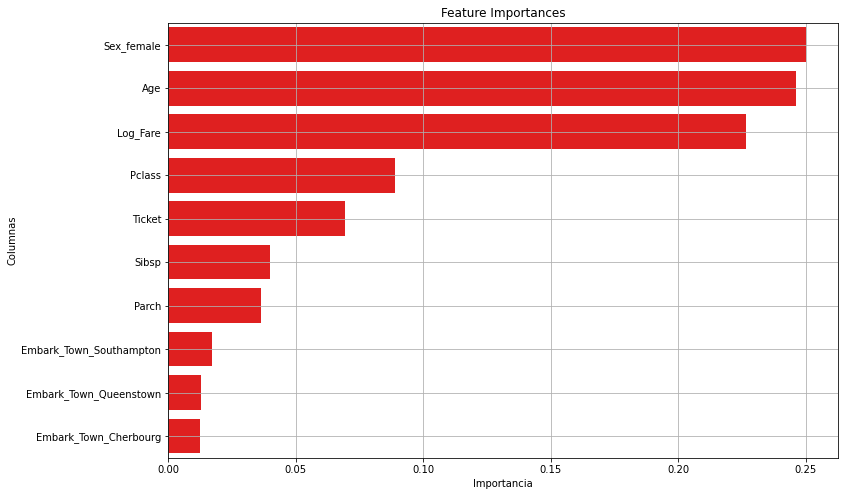

In [110]:
from sklearn.ensemble import RandomForestClassifier

# Modelo de RandomForest para obtener Feature Importance
model = RandomForestClassifier(n_estimators = 250,
                               random_state = 0)
# Entrenamos el modelo
model.fit(X, y)

# Calculamos Feature Importance
importances = model.feature_importances_

df_importances = pd.DataFrame(data = zip(X.columns, importances),
                              columns = ["Columnas", "Importancia"])

df_importances = df_importances.sort_values("Importancia", ascending = False)

print("Feature Importance:")

for index, (feature, importance) in enumerate(df_importances.values):
    
    print(f"{index + 1:2}. feature {index:2} ({importance:20}): {feature}")

plt.figure(figsize = (12, 8))

plt.title("Feature Importances")
sns.barplot(x = df_importances["Importancia"], y = df_importances["Columnas"], color = "red")

plt.grid()
plt.show()

### Conclusiones

- **Age** y **Log_Fare** son las variables más determinantes para predecir correctamente.
- El lugar de **Embark** es irrelevante.
- **Age** no está correlacionada con **Survived**, aún así es la variable más importante en el **Feature Selection**.
- **Log_Fare**, **Sex_female**, **Sex_male** si están correlacionadas con **Survived**.

In [ ]:
################################################################################################################################